### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [175]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [176]:
df = pd.read_csv('data/telco_churn_data.csv')

In [177]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [179]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


## Data cleanup

In [180]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df['Customer Satisfaction'] = df['Customer Satisfaction'].fillna(0)

In [181]:
for col in df:
    if df[col].dtype == object:
        print(col)
        print(df[col].unique().size)
        # if df[col].unique().size <= 2:
        print(df[col].unique())

Customer ID
7043
['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Offer
6
[nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
Internet Type
4
['Fiber Optic' 'Cable' 'DSL' nan]
Contract
3
['Month-to-Month' 'One Year' 'Two Year']
Payment Method
3
['Bank Withdrawal' 'Credit Card' 'Mailed Check']
Gender
2
['Male' 'Female']
City
1106
['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']
Churn Category
6
['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' nan]
Churn Reason
21
['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service 

In [182]:
# Drop customer id as it's unique for every row. Drop columns having nan values
df.drop(['Customer ID','Offer','Churn Reason','Churn Category','Internet Type'], axis=1, inplace=True)

In [183]:
# convert object dtype to numerical
for column in df:
    if df[column].dtype == object:
        df[column] = pd.factorize(df[column])[0]

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Phone Service                      7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Multiple Lines                     7043 non-null   int64  
 6   Internet Service                   7043 non-null   int64  
 7   Avg Monthly GB Download            7043 non-null   int64  
 8   Online Security                    7043 non-null   int64  
 9   Online Backup                      7043 non-null   int64  
 10  Device Protection Plan             7043 non-null   int64  
 11  Premium Tech Support               7043 non-null   int64

<Axes: >

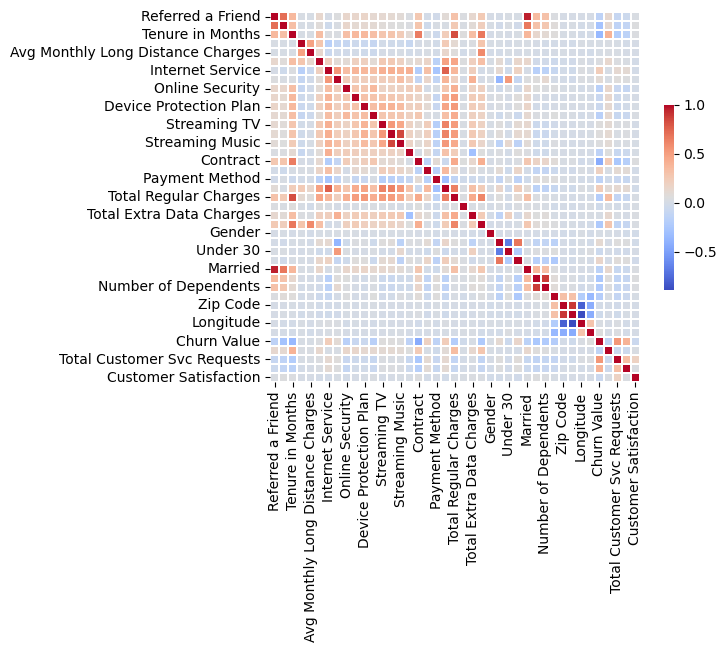

In [185]:
sns.heatmap(df.corr(), fmt=".2f", cmap='coolwarm', square=True, linewidths=.1, cbar_kws={"shrink": .5})

## Reduce Dimensions using PCA

[0.15712877 0.25872678 0.33374921 0.39834102 0.45034866 0.50062469
 0.53569398 0.56659752 0.59669583 0.62508974 0.65043524 0.67512568
 0.69929475 0.72297493 0.74616626 0.76623174 0.78588734 0.80544246
 0.82404014 0.84102669 0.85735269 0.87320365 0.8883256  0.90261813
 0.91620458 0.92958837 0.94036756 0.95055117 0.95916959 0.96691727
 0.97311785 0.97840894 0.98307178 0.98658861 0.9892933  0.99190117
 0.99437197 0.99612429 0.99780134 0.99896576 1.        ]


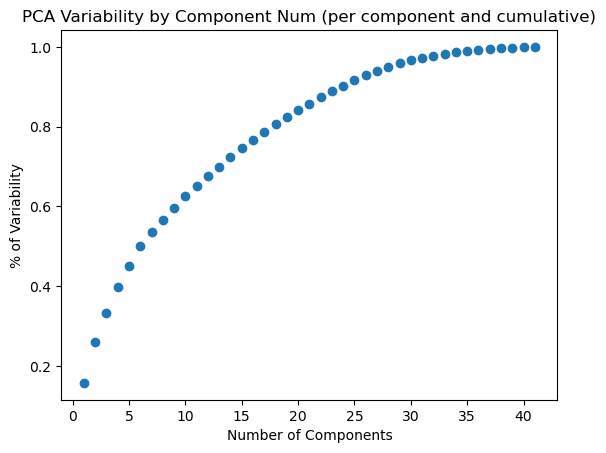

In [186]:
df_norm = (df - df.mean()) / df.std()

pca = PCA(n_components = 41).fit(df_norm)

print(np.cumsum(pca.explained_variance_ratio_))

ax = plt.axes()
ax.scatter(x = range(1,42), y = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("% of Variability")
plt.title("PCA Variability by Component Num (per component and cumulative)")
#plt.show()
plt.savefig('PCA_var.png')
plt.show()



In [187]:
(np.cumsum(pca.explained_variance_ratio_) < 0.8).sum()

17

In [188]:
df_norm = (df - df.mean()) / df.std()
df_scaled = PCA(n_components = 17).fit_transform(df_norm)

## Clustering

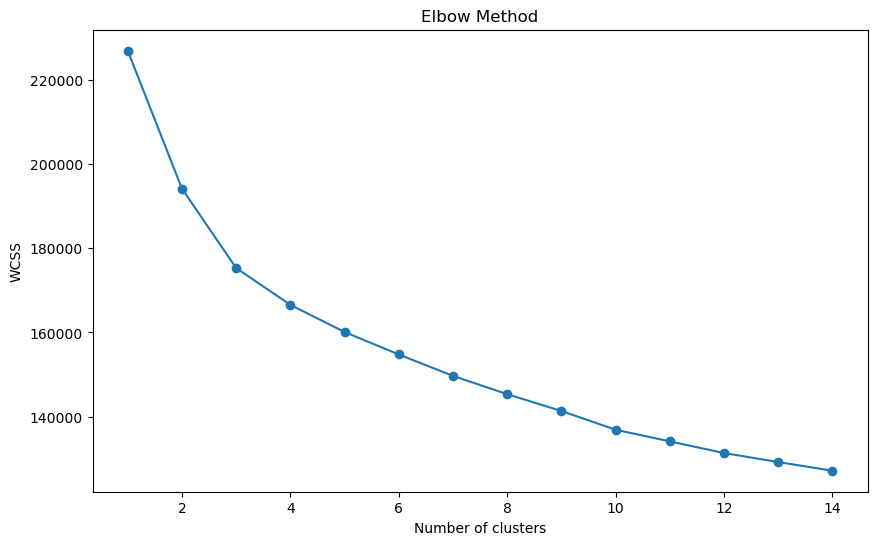

In [189]:
wcss = []  # Within-cluster sum of squares
total_num_clusters = 15

for i in range(1, total_num_clusters):  # Trying different numbers of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is another name for WCSS

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, total_num_clusters), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png',bbox_inches = 'tight')
plt.show()

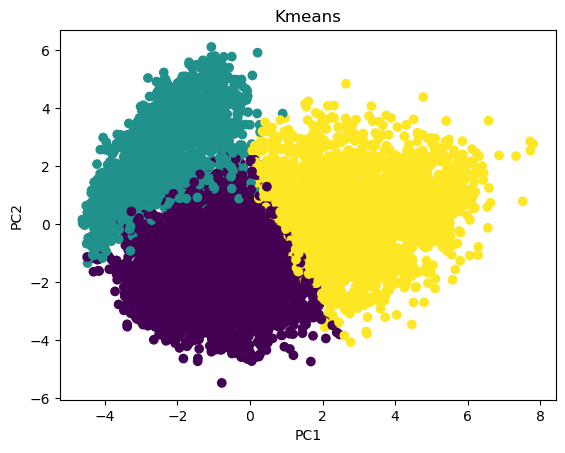

In [190]:
num_clusters = 3

kmeans = KMeans(n_clusters = num_clusters, random_state = 42, n_init = 10).fit(df_scaled)

ax = plt.axes()
ax.scatter(x = df_scaled[:, 0], y = df_scaled[:, 1], c = kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kmeans')
plt.savefig('kmeans_2d.png',bbox_inches = 'tight')


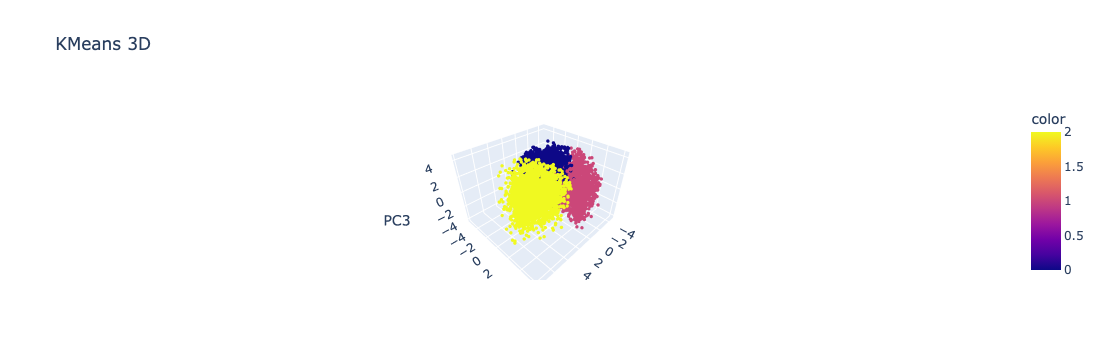

In [191]:
fig1 = px.scatter_3d(data_frame=df_scaled, x = df_scaled[:, 0], y = df_scaled[:, 1],z = df_scaled[:, 2], color = kmeans.labels_,
                 labels={
                     "x": "PC1",
                     "y": "PC2",
                     "z": "PC3"
                 },
                title="KMeans 3D")
fig1.update_traces(marker=dict(size=2))
fig1.write_image('kmeans_3d.png')
fig1.show()

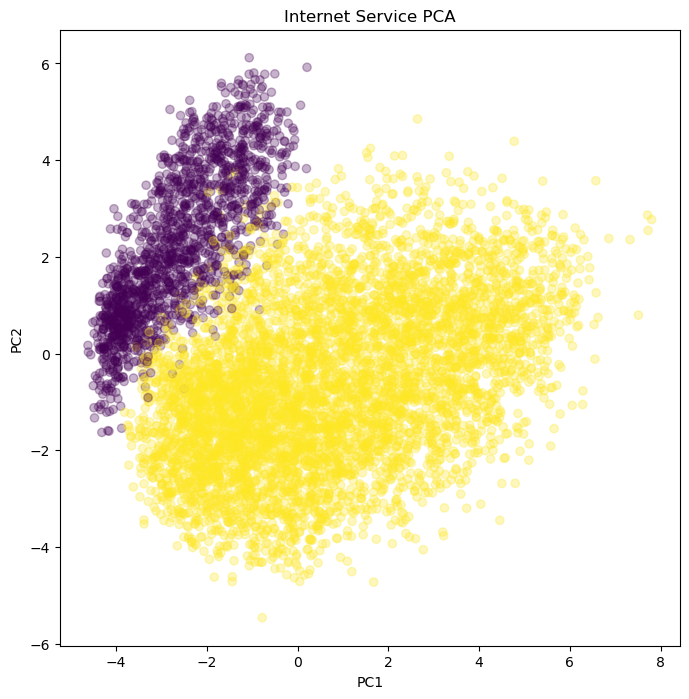

In [192]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Internet Service'], alpha=0.3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Internet Service PCA')
plt.savefig('internet_service.png',bbox_inches = 'tight')

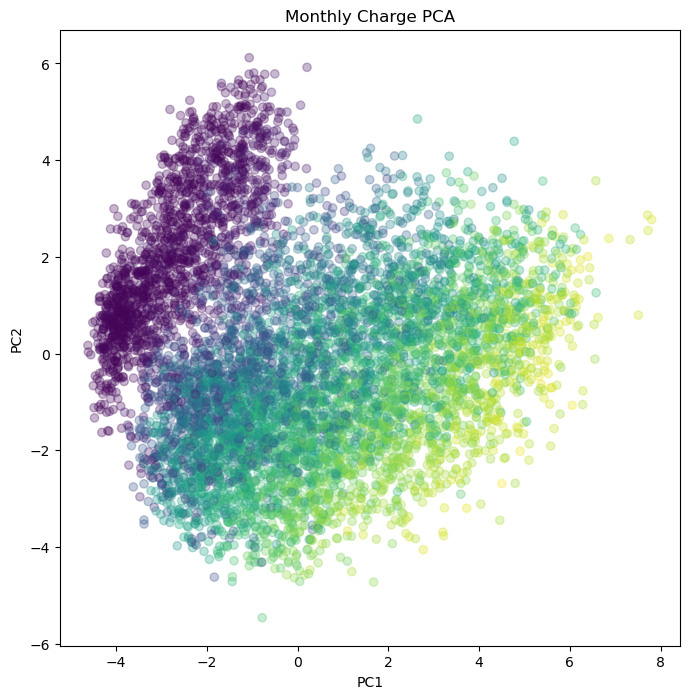

In [199]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Monthly Charge'], alpha=0.3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Monthly Charge PCA')
plt.savefig('monthly_charge.png',bbox_inches = 'tight')